In [40]:
# Load imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
# Load the datasets
circuits = pd.read_csv('archive/circuits.csv')
constructor_results = pd.read_csv('archive/constructor_results.csv')
constructor_standings = pd.read_csv('archive/constructor_standings.csv')
constructors = pd.read_csv('archive/constructors.csv')
driver_standings = pd.read_csv('archive/driver_standings.csv')
drivers = pd.read_csv('archive/drivers.csv')
lap_times = pd.read_csv('archive/lap_times.csv')
pit_stops = pd.read_csv('archive/pit_stops.csv')
qualifying = pd.read_csv('archive/qualifying.csv')
races = pd.read_csv('archive/races.csv')
results = pd.read_csv('archive/results.csv')
seasons = pd.read_csv('archive/seasons.csv')
sprint_results = pd.read_csv('archive/sprint_results.csv')
status = pd.read_csv('archive/status.csv')

In [3]:
# Merge data to get driver standings by year
driver_performance = pd.merge(driver_standings, drivers, on='driverId')
driver_performance = pd.merge(driver_performance, races, on='raceId')

# Ensure we're selecting only the required columns from the 'results' DataFrame
results_subset = results[['raceId', 'driverId', 'constructorId']]

# Rename constructorId in results_subset to avoid conflicts
results_subset = results_subset.rename(columns={'constructorId': 'constructorId_results'})

# Merge with results to get constructorId
driver_performance = pd.merge(driver_performance, results_subset, on=['raceId', 'driverId'])

# Merge with constructors to get the constructor (team) name
constructors_subset = constructors[['constructorId', 'name']].rename(columns={'name': 'team_name'})
driver_performance = pd.merge(driver_performance, constructors_subset, left_on='constructorId_results', right_on='constructorId')

# Drop the extra constructorId columns from the merge to clean up the DataFrame
driver_performance = driver_performance.drop(columns=['constructorId_results', 'constructorId'])

In [4]:
# Step 2: Filter data for the 2024 season
driver_performance_2024 = driver_performance[driver_performance['year'] == 2024].copy()

In [5]:
# Step 3: Define custom colors for each team
custom_colors = {
    'Ferrari': '#FF0000',
    'Sauber': '#10d000',
    'Red Bull': '#0000FF',
    'McLaren': '#ff9c17',
    'Mercedes': '#60d69d',
    'Williams': '#00d8d1',
    'Alpine F1 Team': '#ff8ffa',
    'Aston Martin': '#229236',
    'RB F1 Team': '#bdd000',
    'Haas': '#000000',
}

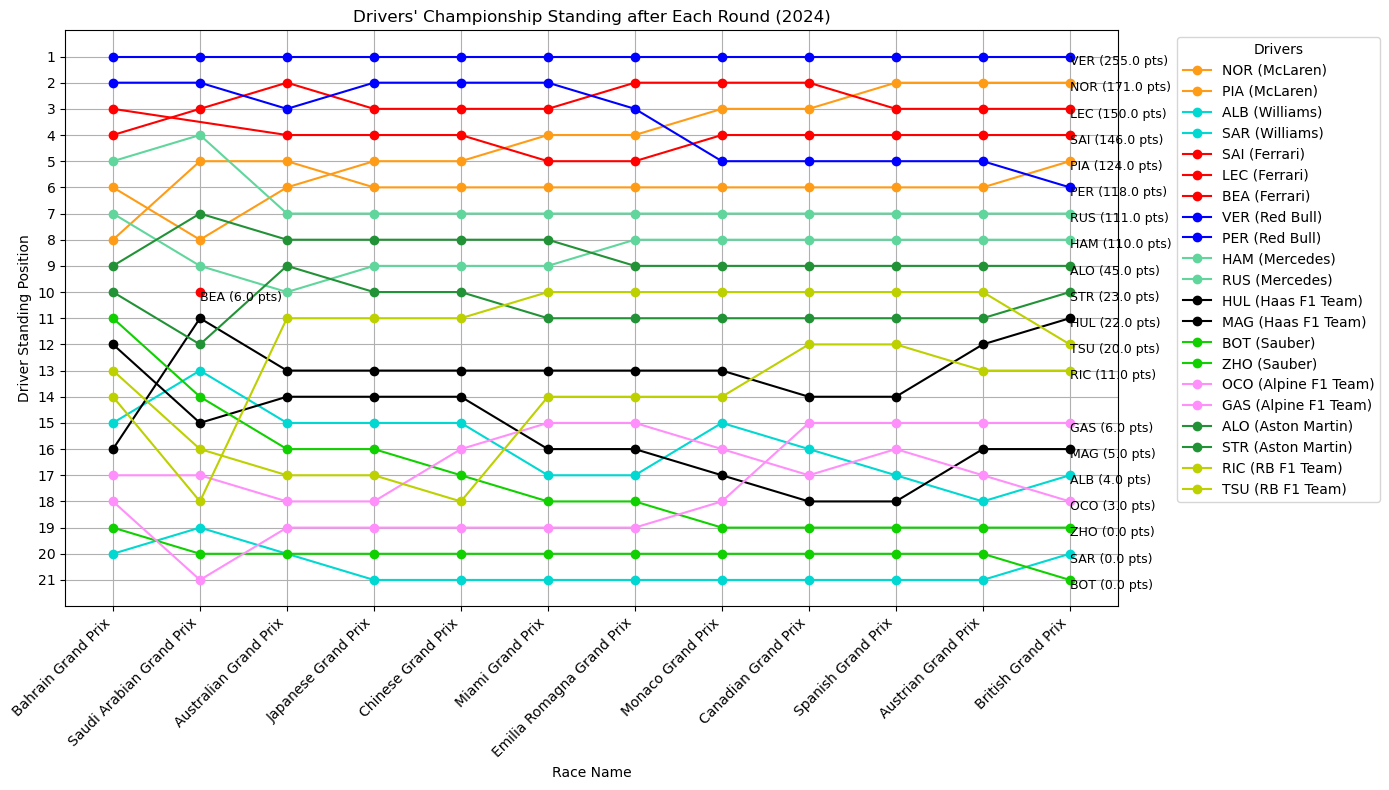

In [6]:
# Plotting
plt.figure(figsize=(14, 8))

# Loop through each driver code to plot their standings over rounds
for code in driver_performance_2024['code'].unique():
    driver_data = driver_performance_2024[driver_performance_2024['code'] == code]
    team = driver_data['team_name'].iloc[0]  # Get the team name for the driver
    
    # Plotting all points
    plt.plot(driver_data['name'], driver_data['position'], marker='o',
             label=f'{code} ({team})', color=custom_colors.get(team, '#000000'), linestyle='-')

    # Adding labels to the last point only, with offset to the right
    last_row = driver_data.iloc[-1]
    plt.text(
        x=last_row['name'], 
        y=last_row['position'] + 0.2,  # Offset label to avoid overlapping with the point
        s=f'{last_row["code"]} ({last_row["points"]} pts)', 
        fontsize=9, 
        ha='left', 
        va='center', 
        color='black'
    )

# Invert y-axis so 1st position is at the top
plt.gca().invert_yaxis()

# Set y-axis ticks to be every integer value
max_position = driver_performance_2024['position'].max()  # Find the maximum position
plt.yticks(range(1, max_position + 1))

# Adding labels and title
plt.xlabel('Race Name')
plt.ylabel('Driver Standing Position')
plt.title('Drivers\' Championship Standing after Each Round (2024)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Drivers', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [8]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [9]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [10]:
constructors_performance = pd.merge(constructor_standings, constructors, on='constructorId')

In [11]:
constructors_performance.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,7,19,1,24.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,18,20,1,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,29,21,1,34.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,40,22,1,42.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [12]:
races_subset = races[['raceId', 'name', 'year']]
constructors_performance = pd.merge(constructors_performance, races_subset, on='raceId')

In [13]:
constructors_performance.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name_x,nationality,url,name_y,year
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Australian Grand Prix,2008
1,2,18,2,8.0,3,3,0,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Australian Grand Prix,2008
2,3,18,3,9.0,2,2,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Australian Grand Prix,2008
3,4,18,4,5.0,4,4,0,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Australian Grand Prix,2008
4,5,18,5,2.0,5,5,0,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,Australian Grand Prix,2008


In [14]:
# Ensure we're selecting only the required columns from the 'results' DataFrame
results_subset = results[['raceId', 'constructorId']]

# Merge with results to get constructorId
constructors_performance = pd.merge(constructors_performance, results_subset, on=['raceId', 'constructorId'])

In [15]:
constructors_performance.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name_x,nationality,url,name_y,year
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Australian Grand Prix,2008
1,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Australian Grand Prix,2008
2,2,18,2,8.0,3,3,0,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Australian Grand Prix,2008
3,2,18,2,8.0,3,3,0,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Australian Grand Prix,2008
4,3,18,3,9.0,2,2,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Australian Grand Prix,2008


In [16]:
constructors_performance_2024 = constructors_performance[constructors_performance['year'] == 2024].copy()

In [17]:
constructors_performance_2024.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name_x,nationality,url,name_y,year
21718,28716,1121,1,12.0,4,4,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Bahrain Grand Prix,2024
21719,28716,1121,1,12.0,4,4,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Bahrain Grand Prix,2024
21720,28721,1121,3,0.0,9,9,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Bahrain Grand Prix,2024
21721,28721,1121,3,0.0,9,9,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Bahrain Grand Prix,2024
21722,28714,1121,6,27.0,2,2,0,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Bahrain Grand Prix,2024


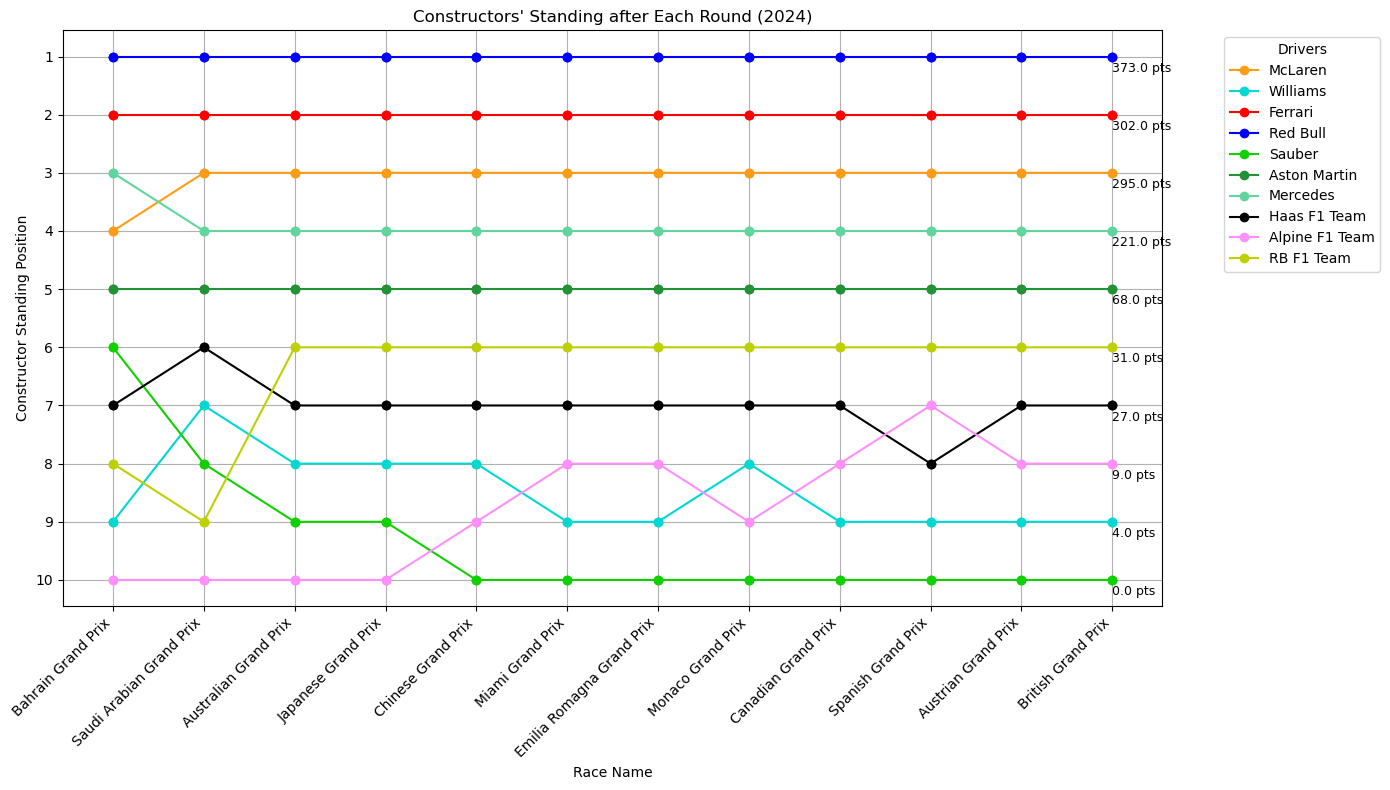

In [18]:
# Plotting
plt.figure(figsize=(14, 8))

# Loop through each driver code to plot their standings over rounds
for name in constructors_performance_2024['name_x'].unique():
    constructor_data = constructors_performance_2024[constructors_performance_2024['name_x'] == name]
    
    # Plotting all points
    plt.plot(constructor_data['name_y'], constructor_data['position'], marker='o',
             label=f'{name}', color=custom_colors.get(name, '#000000'), linestyle='-')
    
    # Adding labels to the last point only, with offset to the right
    last_row = constructor_data.iloc[-1]
    plt.text(
        x=last_row['name_y'], 
        y=last_row['position'] + 0.2,  # Offset label to avoid overlapping with the point
        s=f'{last_row["points"]} pts', 
        fontsize=9, 
        ha='left', 
        va='center', 
        color='black'
    )

# Invert y-axis so 1st position is at the top
plt.gca().invert_yaxis()

# Set y-axis ticks to be every integer value (interval of 1)
max_position = constructors_performance_2024['position'].max()  # Find the maximum position
plt.yticks(range(1, max_position + 1, 1))

# Adding labels and title
plt.xlabel('Race Name')
plt.ylabel('Constructor Standing Position')
plt.title('Constructors\' Standing after Each Round (2024)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Drivers', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [20]:
races[races['year'] == 2024].head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1101,1121,2024,1,3,Bahrain Grand Prix,2024-03-02,15:00:00,https://en.wikipedia.org/wiki/2024_Bahrain_Gra...,2024-02-29,11:30:00,2024-02-29,15:00:00,2024-03-01,12:30:00,2024-03-01,16:00:00,\N,\N
1102,1122,2024,2,77,Saudi Arabian Grand Prix,2024-03-09,17:00:00,https://en.wikipedia.org/wiki/2024_Saudi_Arabi...,2024-03-07,13:30:00,2024-03-07,17:00:00,2024-03-08,13:30:00,2024-03-08,17:00:00,\N,\N
1103,1123,2024,3,1,Australian Grand Prix,2024-03-24,04:00:00,https://en.wikipedia.org/wiki/2024_Australian_...,2024-03-22,01:30:00,2024-03-22,05:00:00,2024-03-23,01:30:00,2024-03-23,05:00:00,\N,\N
1104,1124,2024,4,22,Japanese Grand Prix,2024-04-07,05:00:00,https://en.wikipedia.org/wiki/2024_Japanese_Gr...,2024-04-05,02:30:00,2024-04-05,06:00:00,2024-04-06,02:30:00,2024-04-06,06:00:00,\N,\N
1105,1125,2024,5,17,Chinese Grand Prix,2024-04-21,07:00:00,https://en.wikipedia.org/wiki/2024_Chinese_Gra...,2024-04-19,03:30:00,2024-04-19,07:30:00,\N,\N,2024-04-20,07:00:00,2024-04-20,03:00:00


In [21]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [22]:
races_subset = races[['raceId', 'name', 'year']]

In [23]:
races2024 = races_subset[races_subset['year'] == 2024].copy()

In [24]:
lap_times = pd.merge(lap_times, races2024, on='raceId')

In [25]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds,name,year
0,1121,830,1,1,1:37.284,97284,Bahrain Grand Prix,2024
1,1121,830,2,1,1:36.296,96296,Bahrain Grand Prix,2024
2,1121,830,3,1,1:36.753,96753,Bahrain Grand Prix,2024
3,1121,830,4,1,1:36.647,96647,Bahrain Grand Prix,2024
4,1121,830,5,1,1:37.173,97173,Bahrain Grand Prix,2024


In [26]:
driver_subset = drivers[['driverId', 'code', 'forename', 'surname']]

In [27]:
lap_times = pd.merge(lap_times, driver_subset, on='driverId')

In [28]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds,name,year,code,forename,surname
0,1121,830,1,1,1:37.284,97284,Bahrain Grand Prix,2024,VER,Max,Verstappen
1,1121,830,2,1,1:36.296,96296,Bahrain Grand Prix,2024,VER,Max,Verstappen
2,1121,830,3,1,1:36.753,96753,Bahrain Grand Prix,2024,VER,Max,Verstappen
3,1121,830,4,1,1:36.647,96647,Bahrain Grand Prix,2024,VER,Max,Verstappen
4,1121,830,5,1,1:37.173,97173,Bahrain Grand Prix,2024,VER,Max,Verstappen


In [29]:
# Filter the data for the Bahrain Grand Prix
bahrain_gp = lap_times[lap_times['name'] == 'Bahrain Grand Prix'].copy()

In [30]:
# Convert milliseconds to minutes:seconds.milliseconds format
def convert_to_time_format(ms):
    minutes = ms // 60000
    seconds = (ms % 60000) // 1000
    milliseconds = ms % 1000
    return f"{int(minutes)}:{int(seconds):02}.{int(milliseconds):03}"

In [41]:
# Function to format y-axis ticks
def format_minutes(x, pos):
    minutes = int(x)
    seconds = (x - minutes) * 60
    return f'{minutes:02}:{seconds:05.3f}'

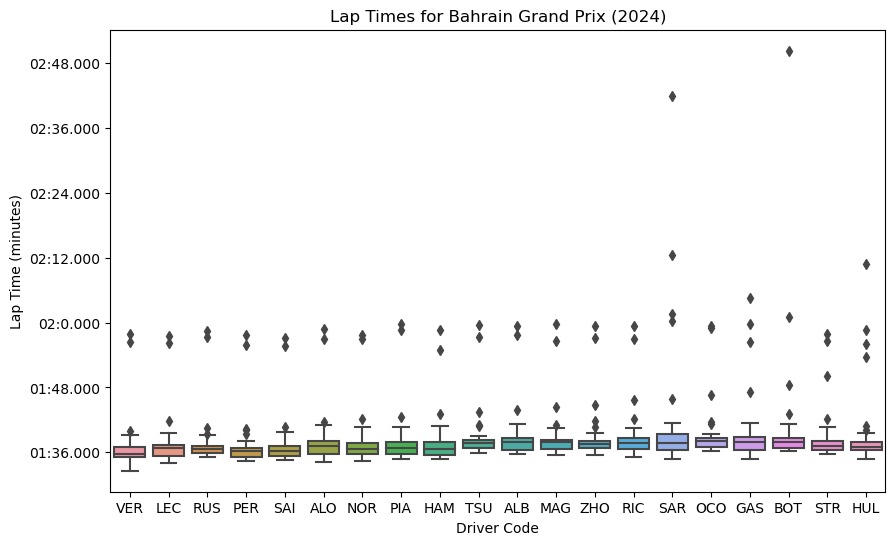

In [42]:
bahrain_gp['lap_time_minutes'] = bahrain_gp['milliseconds'] / 60000

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='code', y='lap_time_minutes', data=bahrain_gp)

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_minutes))

# Adding labels and title
plt.xlabel('Driver Code')
plt.ylabel('Lap Time (minutes)')
plt.title('Lap Times for Bahrain Grand Prix (2024)')

# Show plot
plt.show()

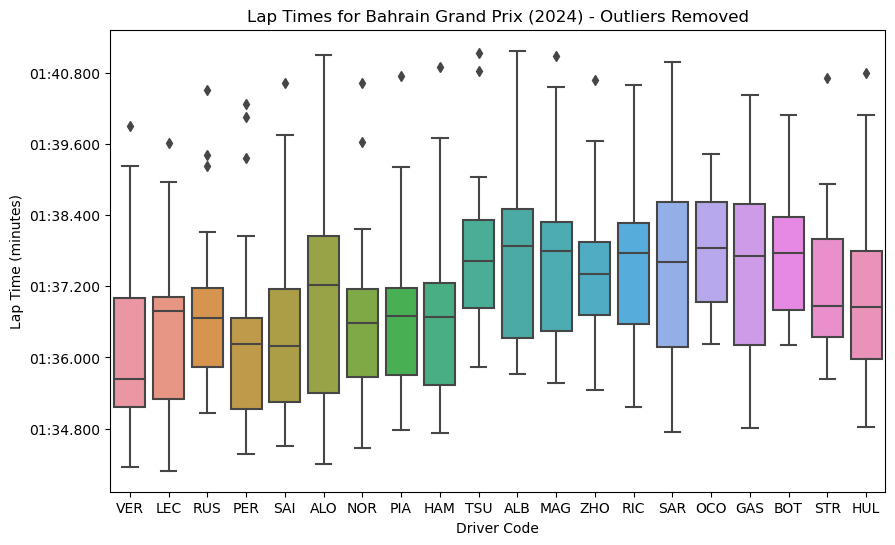

In [43]:
# Calculate Q1, Q3, and IQR
Q1 = bahrain_gp['lap_time_minutes'].quantile(0.25)
Q3 = bahrain_gp['lap_time_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_bahrain_gp = bahrain_gp[(bahrain_gp['lap_time_minutes'] >= lower_bound) & (bahrain_gp['lap_time_minutes'] <= upper_bound)]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='code', y='lap_time_minutes', data=filtered_bahrain_gp)

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_minutes))

# Adding labels and title
plt.xlabel('Driver Code')
plt.ylabel('Lap Time (minutes)')
plt.title('Lap Times for Bahrain Grand Prix (2024) - Outliers Removed')

# Show plot
plt.show()

In [32]:
# Apply the conversion
bahrain_gp['lap_time_formatted'] = bahrain_gp['milliseconds'].apply(convert_to_time_format)

# Calculate mean and standard deviation in milliseconds
mean_lap_time_ms = bahrain_gp['milliseconds'].mean()
std_lap_time_ms = bahrain_gp['milliseconds'].std()

# Convert mean and std from milliseconds to formatted time
mean_lap_time = convert_to_time_format(mean_lap_time_ms)
std_lap_time = convert_to_time_format(std_lap_time_ms)

print(f"Mean Lap Time: {mean_lap_time}")
print(f"Standard Deviation of Lap Times: {std_lap_time}")

Mean Lap Time: 1:38.124
Standard Deviation of Lap Times: 0:05.333


In [36]:
# Calculate mean and standard deviation for each driver
stats = bahrain_gp.groupby('driverId')['milliseconds'].agg(['mean', 'std'])

# Merge with drivers data to get driver names
driver_names = lap_times[['driverId', 'forename', 'surname']].drop_duplicates().set_index('driverId')
stats = stats.join(driver_names, on='driverId')

# Convert mean and std from milliseconds to formatted time
stats['mean_time'] = stats['mean'].apply(convert_to_time_format)
stats['std_time'] = stats['std'].apply(convert_to_time_format)

In [37]:
stats_subset = stats[['forename', 'surname', 'mean_time', 'std_time']]
stats_subset.sort_values("std_time")

,forename,surname,mean_time,std_time
driverId,,,,
832,Carlos,Sainz,1:37.014,0:03.966
844,Charles,Leclerc,1:37.270,0:04.004
815,Sergio,Pérez,1:36.968,0:04.026
1,Lewis,Hamilton,1:37.457,0:04.049
846,Lando,Norris,1:37.424,0:04.076
847,George,Russell,1:37.395,0:04.096
855,Guanyu,Zhou,1:38.419,0:04.119
852,Yuki,Tsunoda,1:38.468,0:04.121
825,Kevin,Magnussen,1:38.447,0:04.122
